### 첫 시작

머신러닝이던 딥러닝이던 가장 먼저해야할 것은 필요할 라이브러리 호출입니다. 물론 보통은 필요한 경우 부르면서 사용합니다.


하지만 Numpy, pandas, matplotlib, seaborn과 같은 아주 기초적인 것은 먼저 호출 후에 사용하는 것을 권장합니다. 왜냐하면, 무조건 쓰이거든요

<br>

### 캐글 타이타닉이란?

- 역사상 최대 해난사고 데이터

- 탑승객의 생존여부 예측 모델을 구하는 것이 핵심입니다.

![](https://images.velog.io/images/qsdcfd/post/e3413b5b-6173-4b60-89be-2741f3c6540b/image.png)

<br>

### Flow

- 데이터 셋 확인

   - 정제 데이터

   - Null data(수정 필요)

- 탐색적 데이터 분석(EDA)

   - feature 분석 및 상관관계 파악
   - 시각화 툴을 이용하여 insight얻기

- feature Engineering

   - 모델 성능 높이기 위한 것

   - one-hot encoding, class로 나누기, 구간 나누기, 텍스트 처리등 시도

- Model 만들기

   -  머신러닝: sklearn을 사용
   
   -  딥너링: Tensorflow, Pytorch

- 모델 학습 및 예측

   - trainset을 가지고 모델 학습

   - testset를 가지고 prediction

- 모델 평가

   - 예측 성능이 원하는 수준인지 판단

   - 문제에 따라 모델을 평가한느 방식이 달라짐

   - 학습된 모델이 무엇을 학습하는지 확인



In [6]:
#필요한 라이브러리 호출

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#항상 쓰는 것이 좋음
#seaborn scheme를 세팅하여 graph의 font size를 지정할 필요없다.
#즉, seaborn의 font_scale를 사용하면 편하다

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

#ignore warnings

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [7]:
#데이터 확인

df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')

In [8]:
df_train.head()#train데이터 상위 5개 추출

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Null data check

- Train

   - Age: 약 20%

   - Cabin::약 80%

   - Embarked: 약 22%

- Test

   - Age: 약 20%

   - Cabin::약 80%

In [11]:
for col in df_train.columns:
    msg = 'coluumn: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum()/ df_train[col].shape[0]))
    print(msg)

coluumn: PassengerId	 Percent of NaN value: 0.00%
coluumn:   Survived	 Percent of NaN value: 0.00%
coluumn:     Pclass	 Percent of NaN value: 0.00%
coluumn:       Name	 Percent of NaN value: 0.00%
coluumn:        Sex	 Percent of NaN value: 0.00%
coluumn:        Age	 Percent of NaN value: 19.87%
coluumn:      SibSp	 Percent of NaN value: 0.00%
coluumn:      Parch	 Percent of NaN value: 0.00%
coluumn:     Ticket	 Percent of NaN value: 0.00%
coluumn:       Fare	 Percent of NaN value: 0.00%
coluumn:      Cabin	 Percent of NaN value: 77.10%
coluumn:   Embarked	 Percent of NaN value: 0.22%


In [12]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


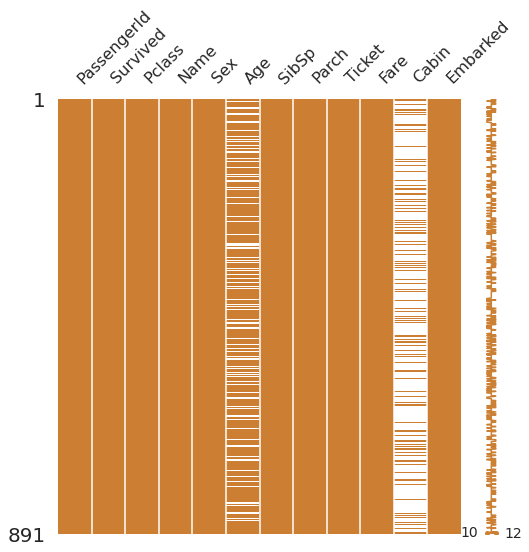

In [13]:
#msno라이브러리를 통해서 null data 시각적으로 보기

msno.matrix(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

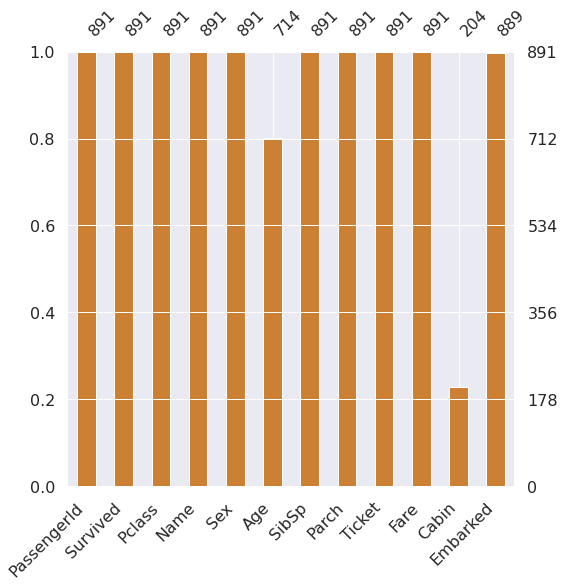

In [14]:
msno.bar(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8,0.5,0.2))

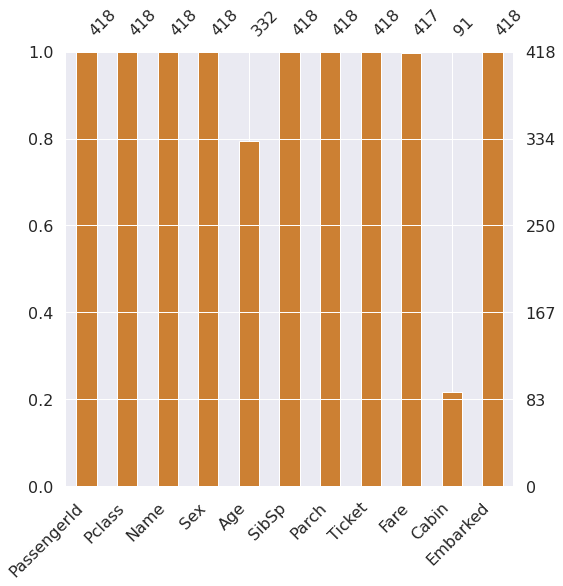

In [17]:
msno.bar(df=df_test.iloc[:, :], figsize = (8,8), color =( 0.8,0.5,0.2))

### Target label확인

- target label이 어떤 distribution 확인

- binary classification경우 1과 0의 분포에 따라서 모델 평가 방식 달라짐


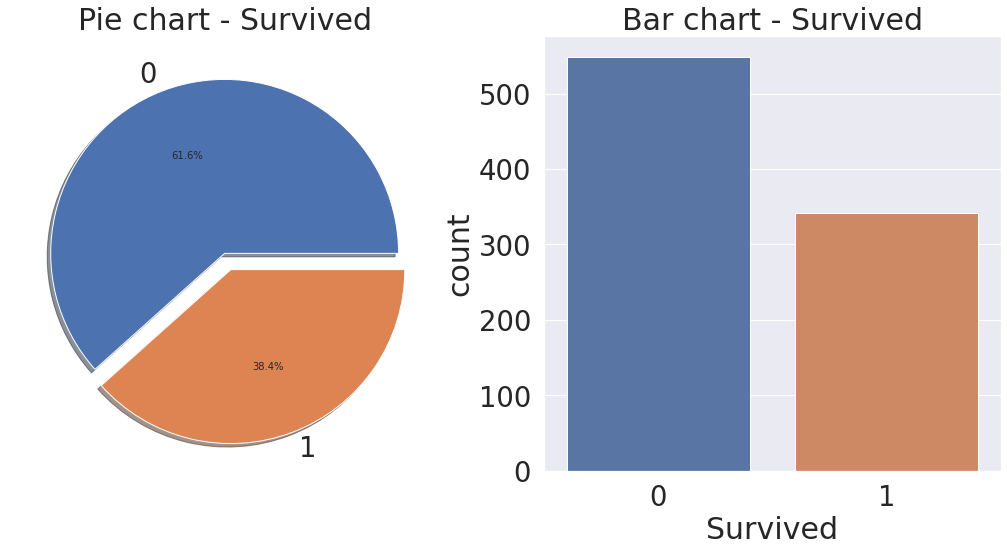

In [21]:
f, ax =  plt.subplots(1, 2, figsize =(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie chart - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Bar chart - Survived')

plt.show()